**Movie IMDB Statistical Analysis**
Required packages: Numpy, Pandas(?), Datascience, MXNet

In [53]:
import numpy as np
import math
import pandas as pan
from datascience import *
import mxnet as mx

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

datascience.__version__

'0.9.5'

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,Tara Subkoff,35,101,37,56,Balthazar Getty,501,nan,Drama|Horror|Mystery|Thriller,Timothy Hutton,#Horror,1547,1044,Lydia Hearst,1,bullying|cyberbullying|girl|internet|throat slitting,http://www.imdb.com/title/tt3526286/?ref_=fn_tt_tt_1,42,English,USA,Not Rated,1.5e+06,2015,418,3.3,nan,750
Color,Dan Trachtenberg,411,104,16,82,John Gallagher Jr.,14000,7.18972e+07,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,10 Cloverfield Lane,126893,14504,Sumalee Montano,0,alien|bunker|car crash|kidnapping|minimal cast,http://www.imdb.com/title/tt1179933/?ref_=fn_tt_tt_1,440,English,USA,PG-13,1.5e+07,2016,338,7.3,2.35,33000
Color,Timothy Hines,1,111,0,247,Kelly LeBrock,1000,14616,Drama,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1,nan,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10,English,USA,R,1.2e+07,2015,445,7.5,1.85,26000
Color,Gil Junger,133,97,19,835,Heath Ledger,23000,3.81761e+07,Comedy|Drama|Romance,Joseph Gordon-Levitt,10 Things I Hate About You,222099,37907,Andrew Keegan,6,dating|protective father|school|shrew|teen movie,http://www.imdb.com/title/tt0147800/?ref_=fn_tt_tt_1,549,English,USA,PG-13,1.6e+07,1999,13000,7.2,1.85,10000
nan,Christopher Barnard,nan,22,0,nan,nan,5,nan,Comedy,Mathew Buck,"10,000 B.C.",6,5,nan,0,nan,http://www.imdb.com/title/tt1869849/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,nan,7.2,nan,0


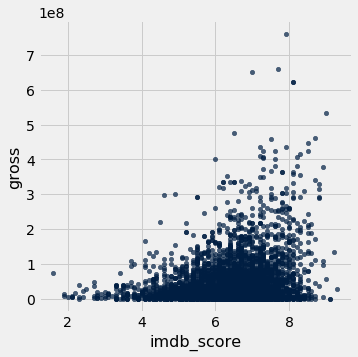

In [63]:
meta = Table().read_table('movie_metadata.csv')
meta.sort('movie_title').show(5)
meta.scatter('imdb_score', 'gross')

In [45]:
imdb = Table().read_table('imdb.csv')
imdb

fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,1,0,19,96,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,2,1,35,110,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,3,4,67,428,376,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,1,1,53,123,219,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,2,0,38,187,186,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0022100,tt0022100,M (1931),m,http://www.imdb.com/title/tt0022100/,8.5,73726,7020,1931,video.movie,1,0,28,4,254,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,nan,nan,nan,nan
titles01/tt0025316,tt0025316,Es geschah in einer Nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/,8.3,46503,6300,1934,video.movie,4,1,40,183,211,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0027977,tt0027977,Moderne Zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/,8.6,90847,5220,1936,video.movie,3,1,44,27,180,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan
titles01/tt0031381,tt0031381,Vom Winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/,8.2,160414,14280,1939,video.movie,10,6,143,1263,653,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,nan,nan,nan,nan
titles01/tt0031679,tt0031679,Mr. Smith geht nach Washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/,8.4,58169,7740,1939,video.movie,4,10,34,110,226,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan


We now have both datasets loaded. 

Lets start with the meta table to train a neural net in mxnet.